### **Import Library**

In [ ]:
from pprint import pprint
import matplotlib.pyplot as plt

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [ ]:
# USE csv.reader() TO READ A TSV FILE

  import pandas as pd
  import csv
  csv.field_size_limit(10000000) # set field limit in row data

#tsv_file
#with open("SINGGALANG.tsv") as fd:
#    rd = csv.reader(fd, delimiter="\t", quotechar='"')
#    for row in rd:
#        print(row)

10000000

### **Import Data**

In [ ]:
df = pd.read_csv('SINGGALANG.tsv',sep='\t',header=None,names=["Tokens","Tags"],error_bad_lines=False, engine="python")

Skipping line 263233: '	' expected after '"'
Skipping line 712939: unexpected end of data


In [ ]:
df

,Tokens,Tags
0,Ia,O
1,menjabat,O
2,sebagai,O
3,Presiden,O
4,ketiga,O
...,...,...
689899,zgjidhet,O
689900,presidente,O
689901,e,O
689902,Republikës,O


# **DATA PREPROCESSING**

In [ ]:
df.shape

(689904, 2)

In [ ]:
len(df)

689904

In [ ]:
df.head()

,Tokens,Tags
0,Ia,O
1,menjabat,O
2,sebagai,O
3,Presiden,O
4,ketiga,O


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689904 entries, 0 to 689903
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Tokens  689892 non-null  object
 1   Tags    689904 non-null  object
dtypes: object(2)
memory usage: 10.5+ MB


In [ ]:
df.tail()

,Tokens,Tags
689899,zgjidhet,O
689900,presidente,O
689901,e,O
689902,Republikës,O
689903,'',O


# **EDA**

In [ ]:
df.describe()

,Tokens,Tags
count,689892,689904
unique,59662,4
top,",",O
freq,40084,625259


In [ ]:
data_duplicate = df[df['Tokens'].duplicated()]
print(f'No. of duplicate reviews on train data: {data_duplicate.shape[0]}')

No. of duplicate reviews on train data: 630241


# **Preprocessing data**

In [ ]:
def NER(review):
    for i in range(len(review)):
        text = review.text.iloc[i]
        for sent in nltk.sent_tokenize(Tokens):
            for chunk in nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(sent))):
                if hasattr(chunk, 'label') and chunk.label:
                    if chunk.label() == 'ORGANIZATION' or  chunk.label() == 'PERSON' or  chunk.label() == 'DATE' or  chunk.label() == 'LOCATION':
                        name_value = ' '.join(child[0] for child in chunk.leaves())
                        text = text.replace(name_value, "")
                        review.text.iloc[i] = text
    return review

In [ ]:
def case_folding(review):
    for i in range(len(review)):
        text = review.text[i].lower()
        review.text.iloc[i] = text 
    return review

In [ ]:
def remove_punctuation(review):
    remove = string.punctuation
    for i in range(len(review)):
        for kata in remove:
            text = review.text[i].replace(kata,"")
            review.text.iloc[i] = text 
    return review

In [ ]:
def stop_removal(review):
    from nltk.tokenize import sent_tokenize, word_tokenize
    cachedStopWords = set(stopwords.words("english"))
    for i in range(len(review)):
        text = review.text.iloc[i]
        teks =" ".join([word for word in text.split() if word not in cachedStopWords])
        review.text.iloc[i] = teks
    return review

In [ ]:
def stemming(review):
    ps = PorterStemmer()
    for i in range(len(review)):
        text = review.text.iloc[i]
        text = ps.stem(text)
        review.text.iloc[i] = text
    return review

In [ ]:
def lemmatization (review):
    lm = WordNetLemmatizer()
    for i in range(len(review)):
        text = review.text.iloc[i]
        text = lm.lemmatize(text)
        review.text.iloc[i] = text
    return review

In [ ]:
def preprocessing_data(review):
    hasil_ner = NER(review)
    hasil_case_folding = case_folding(hasil_ner)
    hasil_remove_punctuation = NER(review)
    hasil_stop_removal = stop_removal(hasil_remove_punctuation)
    hasil_stemming = stemming( hasil_stop_removal)
    hasil_lemmatization = lemmatization(hasil_stemming)
    return hasil_lemmatization

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [ ]:
df = pd.read_csv('SINGGALANG.tsv',sep='\t',header=None,names=["Tokens","Tags"],error_bad_lines=False, engine="python")

Skipping line 263233: '	' expected after '"'
Skipping line 712939: unexpected end of data


In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize

# Tokenize the article into sentences: sentences
sentences = sent_tokenize(article)

# Tokenize each sentence into words: token_sentences
token_sentences = [word_tokenize(sent) for sent in sentences]

# Tag each tokenized sentence into parts of speech: pos_sentences
pos_sentences = [nltk.pos_tag(sent) for sent in token_sentences]

# Create the named entity chunks: chunked_sentences
chunked_sentences = nltk.ne_chunk_sents(pos_sentences, binary=True)

# Test for stems of the tree with 'NE' tags
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, "label") and chunk.label() == 'NE':
            print(chunk)

Output streaming akan dipotong hingga 5000 baris terakhir.
(NE KECAMATAN/NNP)
(NE TOMANURUNG/NNP O/NNP)
(NE Israel/NNP Place/NNP)
(NE Israel/NNP Place/NNP Defence/NNP)
(NE Italia/NNP Place/NNP)
(NE Italia/NNP Place/NNP)
(NE Italia/NNP Place/NNP)
(NE Italia/NNP Place/NNP)
(NE DENONG/NNP)
(NE Malaysia/NNP Place/NNP)
(NE Michael/NNP)
(NE American/NNP)
(NE American/NNP)
(NE American/NNP Person/NNP)
(NE American/NNP)
(NE John/NNP)
(NE Richard/NNP Person/NNP Kevin/NNP Person/NNP)
(NE Karina/NNP Person/NNP Suwandi/NNP Person/NNP)
(NE Sophian/NNP)
(NE Palang/NNP Organisation/NNP Merah/NNP Organisation/NNP)
(NE Bagian/NNP)
(NE MEDAN/NNP O/NNP)
(NE Hokkian/NNP)
(NE CINA/NNP)
(NE Leighton/NNP Place/NNP)
(NE MALARI/NNP)
(NE Parsia/NNP)
(NE Tapian/JJ Place/NNP Nauli/NNP Place/NNP)
(NE Sosorgadung/NNP)
(NE Pargarutan/NNP O/NNP)
(NE Pardamean/NNP Place/NNP)
(NE Indian/NNP)
(NE Indian/NNP)
(NE Indian/NNP)
(NE Carolina/NNP Place/NNP Utara/NNP Place/NNP)
(NE Bagian/NNP)
(NE Bagian/NNP)
(NE Malaysia/NNP 

In [ ]:
chunked_sentences = nltk.ne_chunk_sents(pos_sentences, binary=False)

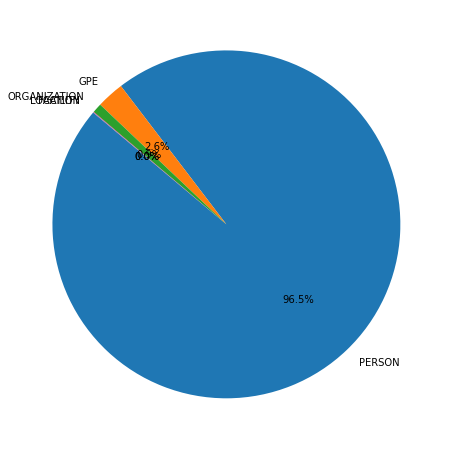

In [ ]:
from collections import defaultdict

# Create the defaultdict: ner_categories
ner_categories = defaultdict(int)

# Create the nested for loop
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, 'label'):
            ner_categories[chunk.label()] += 1
            
# Create a list from the dictionary keys for the cart labels: labels
labels = list(ner_categories.keys())

# Create a list of the values: values
values = [ner_categories.get(l) for l in labels]

# Create the pie chart
fig = plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140);

In [ ]:
import spacy
from spacy import displacy

displacy.render(data,style="ent",jupyter=True)

ValueError: ignored

In [ ]:
NER = spacy.load("en_core_web_sm", disable=["tok2vec", "tagger", "parser", "attribute_ruler", "lemmatizer"])

In [ ]:
raw_text = df

In [ ]:
data = pd.read_csv('SINGGALANG.tsv', delimiter = '\t', quoting = 3)

In [ ]:
with open('./SINGGALANG.tsv', 'r') as file:
  article = file.read()

In [ ]:
data

,Ia,O
0,menjabat,O
1,sebagai,O
2,Presiden,O
3,ketiga,O
4,Mesir,Place
...,...,...
1478262,di,O
1478263,kalangan,O
1478264,pelajar,O
1478265,Muhammadiyah,Organisation


In [ ]:
NER = spacy.load("en_core_web_sm", disable=["tok2vec", "tagger", "parser", "attribute_ruler", "lemmatizer"])

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize

# Tokenize the article into sentences: sentences
sentences = sent_tokenize(article)

# Tokenize each sentence into words: token_sentences
token_sentences = [word_tokenize(sent) for sent in sentences]

# Tag each tokenized sentence into parts of speech: pos_sentences
pos_sentences = [nltk.pos_tag(sent) for sent in token_sentences]

# Create the named entity chunks: chunked_sentences
chunked_sentences = nltk.ne_chunk_sents(pos_sentences, binary=True)

# Test for stems of the tree with 'NE' tags
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, "label") and chunk.label() == 'NE':
            print(chunk)

NameError: ignored

ValueError: ignored